# Importing Dataset

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('automobile.csv', delimiter=',')  
print(data.head)

<bound method NDFrame.head of      normalized-losses         make fuel-type aspiration  num-of-doors  \
0                  NaN  alfa-romero       gas        std           2.0   
1                  NaN  alfa-romero       gas        std           2.0   
2                  NaN  alfa-romero       gas        std           2.0   
3                164.0         audi       gas        std           4.0   
4                164.0         audi       gas        std           4.0   
..                 ...          ...       ...        ...           ...   
200               95.0        volvo       gas        std           4.0   
201               95.0        volvo       gas      turbo           4.0   
202               95.0        volvo       gas        std           4.0   
203               95.0        volvo    diesel      turbo           4.0   
204               95.0        volvo       gas      turbo           4.0   

      body-style drive-wheels engine-location  wheel-base  length  ...  \
0    co

# Data Exploration
- Step 1: Check for missing values.
- Step 2: Visualize numerical distributions.

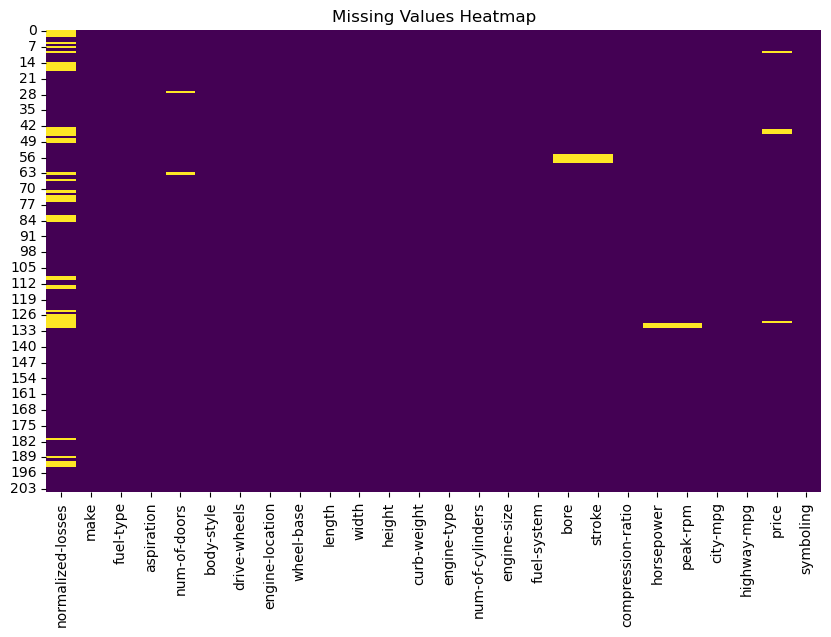

In [4]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [5]:
# Summary statistics for numerical columns
print("Summary Statistics for Numerical Features:")
print(data.describe())

# Frequency counts for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("\nFrequency Counts for Categorical Features:")
for column in categorical_columns:
    print(f"\n{column}:\n{data[column].value_counts()}")


Summary Statistics for Numerical Features:
       normalized-losses  num-of-doors  wheel-base      length       width  \
count         164.000000    203.000000  205.000000  205.000000  205.000000   
mean          122.000000      3.123153   98.756585  174.049268   65.907805   
std            35.442168      0.994841    6.021776   12.337289    2.145204   
min            65.000000      2.000000   86.600000  141.100000   60.300000   
25%            94.000000      2.000000   94.500000  166.300000   64.100000   
50%           115.000000      4.000000   97.000000  173.200000   65.500000   
75%           150.000000      4.000000  102.400000  183.100000   66.900000   
max           256.000000      4.000000  120.900000  208.100000   72.300000   

           height  curb-weight  num-of-cylinders  engine-size        bore  \
count  205.000000   205.000000        205.000000   205.000000  201.000000   
mean    53.724878  2555.565854          4.380488   126.907317    3.329751   
std      2.443522   520

## Numerical Feature Visualization

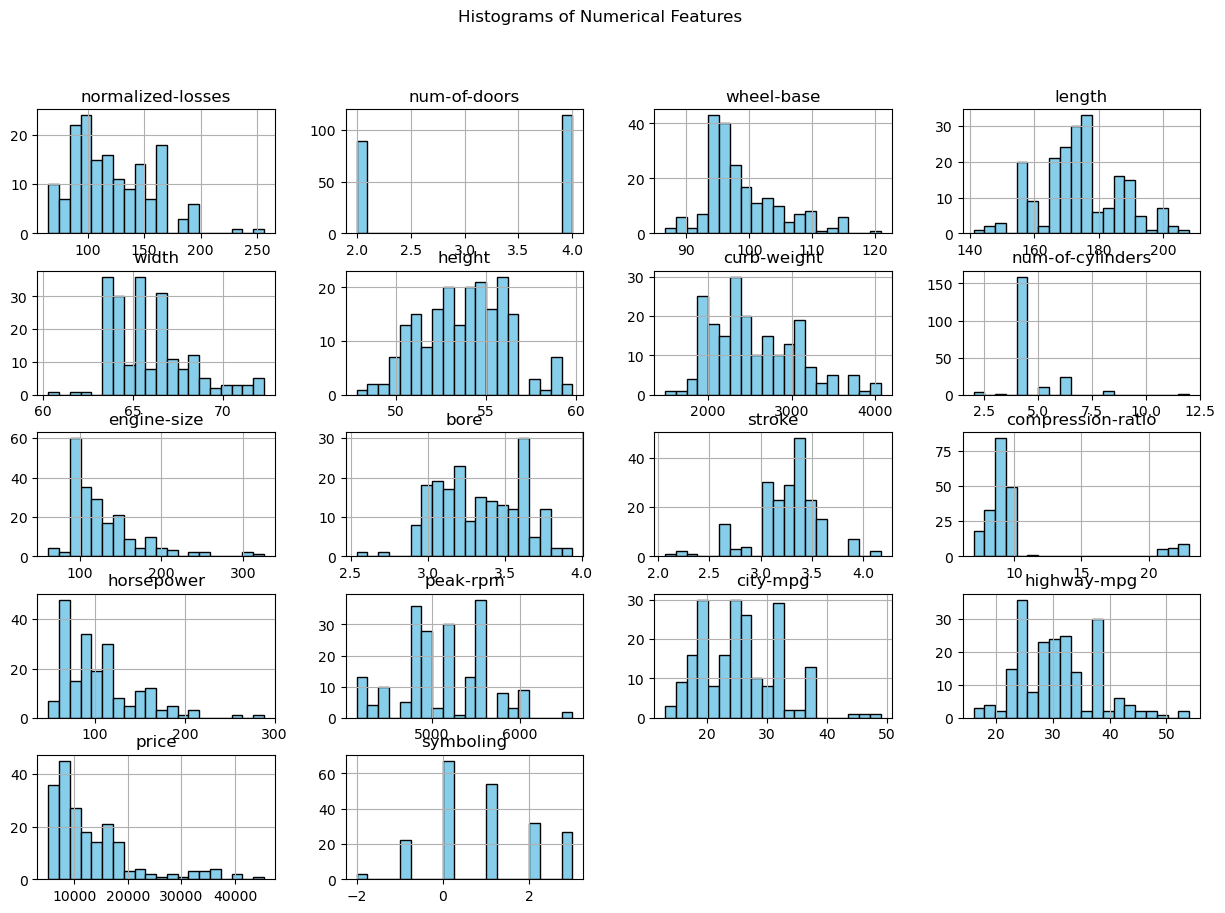

In [7]:
# Histograms for numerical features
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns].hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()


## Categorical Feature Visualization

C:\Users\sadok\AppData\Local\Temp\ipykernel_20148\1591588884.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[column], order=data[column].value_counts().index, palette="viridis")
C:\Users\sadok\AppData\Local\Temp\ipykernel_20148\1591588884.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[column], order=data[column].value_counts().index, palette="viridis")
C:\Users\sadok\AppData\Local\Temp\ipykernel_20148\1591588884.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[column], order=data[column].value_counts().index,

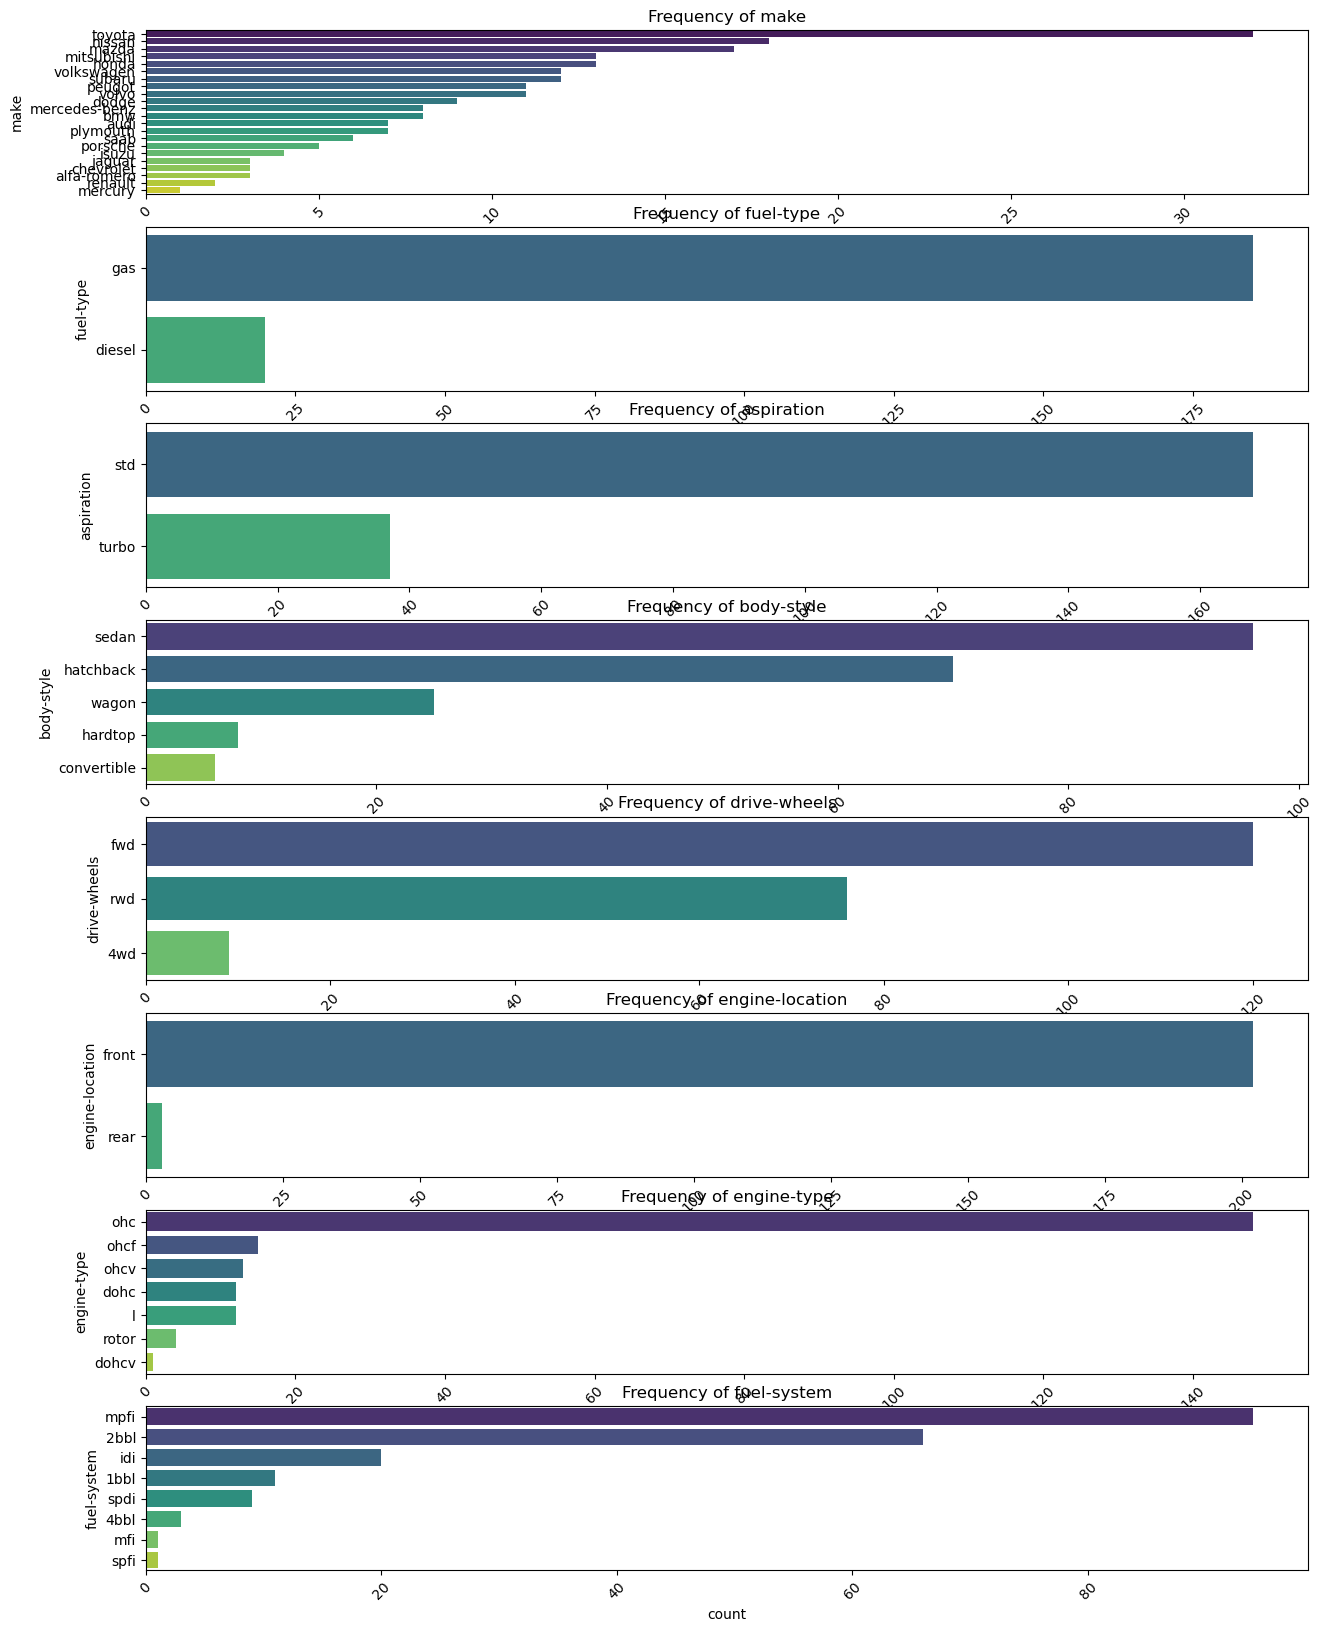

In [9]:
# Bar charts for categorical features
categorical_columns = data.select_dtypes(include=['object']).columns
plt.figure(figsize=(15, 20))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i)
    sns.countplot(data[column], order=data[column].value_counts().index, palette="viridis")
    plt.title(f"Frequency of {column}")
    plt.xticks(rotation=45)
plt.show()


## Correlation heatmap for numerical features

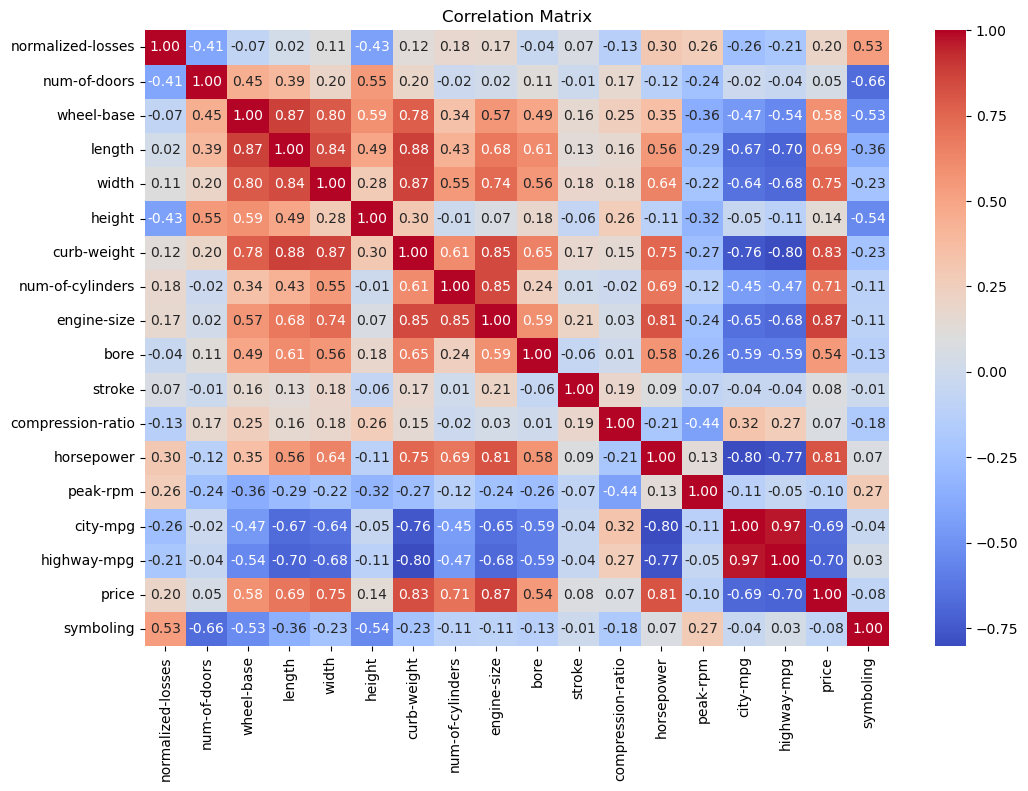

In [11]:
# Select only numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 8))
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Pairplot for key numerical relationships

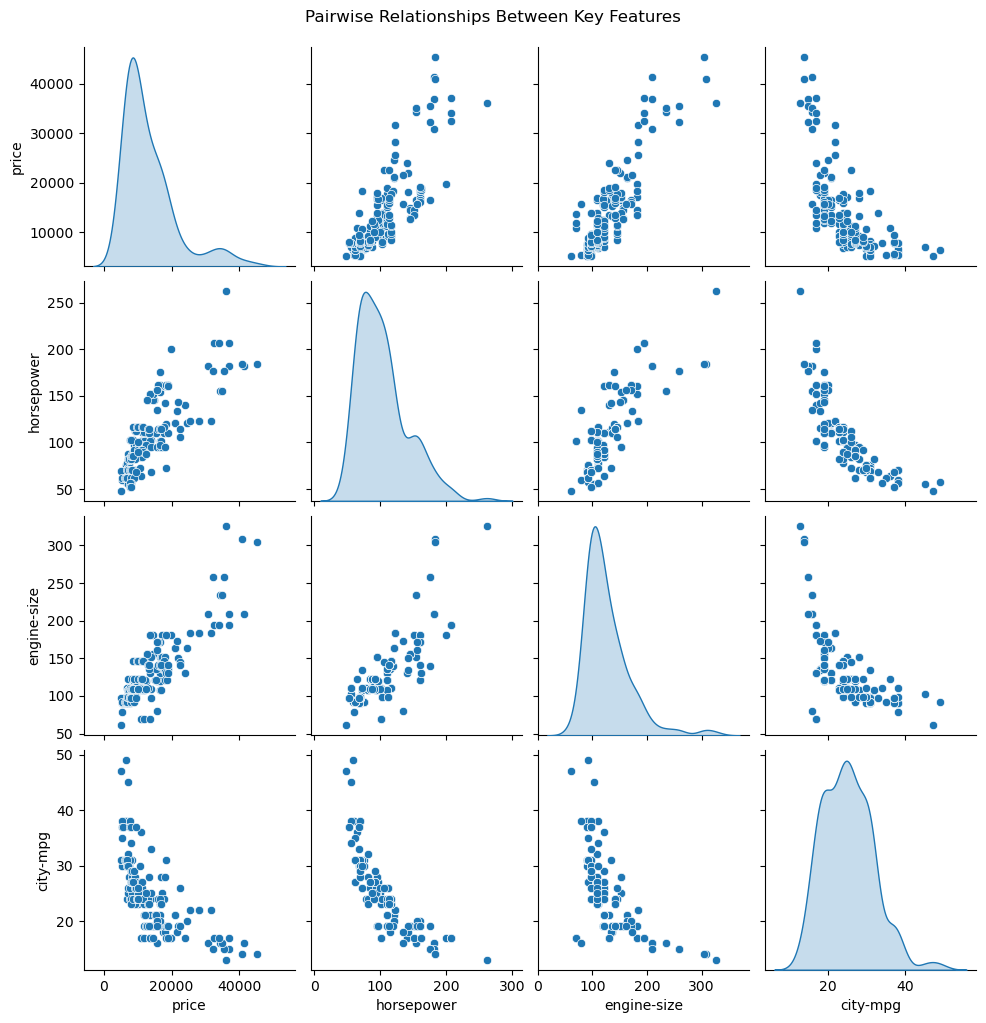

In [13]:
# Ensure no non-numeric values or missing values are present
selected_features = ['price', 'horsepower', 'engine-size', 'city-mpg']
pairplot_data = data[selected_features].dropna()

sns.pairplot(pairplot_data, diag_kind="kde")
plt.suptitle("Pairwise Relationships Between Key Features", y=1.02)
plt.show()

#  Preprocessing
- Handle Missing Values
- Encode Categorical Variables (Use one-hot encoding to convert categories into numerical features)
- Scale Numerical Features (Normalize features using StandardScaler)
- Split Dataset (Separate into training and testing datasets)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Separate features and target
target_column = 'price'  # Replace 'price' with the actual target column
X = data.drop(target_column, axis=1)
y = data[target_column]


# Identify numerical and categorical columns
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Define preprocessing for numerical and categorical features
numerical_transformer = SimpleImputer(strategy='median') # Fill missing val with median
categorical_transformer = SimpleImputer(strategy='most_frequent') # Fill missing val with most frequent category


# Combine preprocessors in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns) # Create dummy variable for each unique category
    ]
)

# Fill missing target values with the median (you can also use mean, if you prefer)
y_filled = y.fillna(y.median())

# Apply preprocessing to the features
X_preprocessed = preprocessor.fit_transform(X)

# Scale the numerical features
scaler = StandardScaler()
X_preprocessed[:, :len(numerical_columns)] = scaler.fit_transform(X_preprocessed[:, :len(numerical_columns)]) # Ensure all features have a mean of 0 and standard deviation of 1 for uniformity

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_filled, test_size=0.2, random_state=42)

print(f"Preprocessed data shape: {X_train.shape}, {X_test.shape}")


Preprocessed data shape: (164, 68), (41, 68)


# Models Training

## Linear Regression

- Linear Regression is a fundamental machine learning algorithm used for predicting a continuous target variable based on one or more predictor variables. It assumes a linear relationship between the input features and the target variable.

- Why Chosen: Linear regression serves as a baseline model. It is simple, interpretable, and often provides a good starting point for regression tasks. It works well when there is a linear relationship between the features and the target.

In [18]:
from sklearn.linear_model import LinearRegression
# Initialize models
linear_model = LinearRegression()
# Train models
linear_model.fit(X_train, y_train)

print("Linear Regression Model trained successfully!")

Linear Regression Model trained successfully!


## Decision Tree Regressor (DTR)

- A decision tree is a non-linear model that splits the dataset into smaller, homogeneous groups based on feature values. It creates a tree-like structure where each node represents a feature decision and each leaf represents an outcome.

- Why Chosen: Decision trees can capture non-linear relationships in the data, making them flexible. They are easy to understand and interpret visually. However, they can overfit if not pruned properly, so they require careful tuning.

In [20]:
from sklearn.tree import DecisionTreeRegressor
# Initialize models
decision_tree = DecisionTreeRegressor(random_state=42)
# Train models
decision_tree.fit(X_train, y_train)

print("Decision Tree Regressor Model trained successfully!")

Decision Tree Regressor Model trained successfully!


## Random Forest Regressor (RFR)

- Random Forest is an ensemble learning method that builds multiple decision trees during training and merges them to produce a more accurate and stable prediction. It mitigates overfitting problems common in individual decision trees.

- Why Chosen: Random Forest is a powerful model that can handle both linear and non-linear relationships. It is less prone to overfitting compared to a single decision tree and performs well on a wide range of datasets, making it a robust choice for this task.

In [22]:
from sklearn.ensemble import RandomForestRegressor
# Initialize models
random_forest = RandomForestRegressor(random_state=42)
# Train models
random_forest.fit(X_train, y_train)

print("Random Forest Regressor Model trained successfully!")

Random Forest Regressor Model trained successfully!


## K-Nearest Neighbors Regressor (KNN)

- K-Nearest Neighbors is a simple, instance-based learning algorithm where the prediction for a new data point is based on the average (or weighted average) of the target values of its k nearest neighbors in the training set.

- Why Chosen: KNN is a non-parametric model, meaning it makes no assumptions about the data distribution. It is useful for problems where relationships between variables are not explicitly defined and can handle both linear and non-linear data well. However, it can be computationally expensive with large datasets.

In [24]:
from sklearn.neighbors import KNeighborsRegressor
# Initialize models
knn = KNeighborsRegressor(n_neighbors=5)
# Train models
knn.fit(X_train, y_train)

print("K-Nearest Neighbors Regressor Model trained successfully!")

K-Nearest Neighbors Regressor Model trained successfully!


#### Models saved for reuse
Saving Models to reuse later using joblib

In [26]:
import joblib
# Save trained models
joblib.dump(linear_model, 'linear_model.pkl')
joblib.dump(decision_tree, 'decision_tree.pkl')
joblib.dump(random_forest, 'random_forest.pkl')
joblib.dump(knn, 'knn_model.pkl')

print("All models saved successfully!")

All models saved successfully!


# Models Evaluation

Now that we have selected Linear Regression, Decision Tree, Random Forest, and K-Nearest Neighbors (KNN), we can proceed with evaluating these models. Evaluation metrics commonly used for regression tasks include Mean Absolute Error (MAE), Mean Squared Error (MSE).

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialize a dictionary to store the evaluation results
evaluation_results = {}

# Evaluate each model on the test set
models = [linear_model, decision_tree, random_forest, knn]
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'KNN']

for model, name in zip(models, model_names):
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate MAE and RMSE
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Store the results in the dictionary
    evaluation_results[name] = {
        'MAE': mae,
        'RMSE': rmse
    }

# Print the evaluation results
for model_name, metrics in evaluation_results.items():
    print(f"\n{model_name} Evaluation:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


Linear Regression Evaluation:
MAE: 451046849185826.5625
RMSE: 2888109012225198.0000

Decision Tree Evaluation:
MAE: 1867.0000
RMSE: 2715.3668

Random Forest Evaluation:
MAE: 1542.4167
RMSE: 2359.3793

KNN Evaluation:
MAE: 2908.3171
RMSE: 4887.4601


#### Issues with Linear Regression 

The evaluation results show that there are significant discrepancies in the Linear Regression model, where the MAE and RMSE values are extremely large, which is unusual for typical regression tasks.

So it might not be the best model for this dataset.

In [30]:
# Initialize a dictionary to store the evaluation results
evaluation_results = {}

# Evaluate each model on the test set
models = [decision_tree, random_forest, knn]
model_names = ['Decision Tree', 'Random Forest', 'KNN']

for model, name in zip(models, model_names):
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate MAE and RMSE
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Store the results in the dictionary
    evaluation_results[name] = {
        'MAE': mae,
        'RMSE': rmse
    }

# Print the evaluation results
for model_name, metrics in evaluation_results.items():
    print(f"\n{model_name} Evaluation:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


Decision Tree Evaluation:
MAE: 1867.0000
RMSE: 2715.3668

Random Forest Evaluation:
MAE: 1542.4167
RMSE: 2359.3793

KNN Evaluation:
MAE: 2908.3171
RMSE: 4887.4601


## Results Visualization

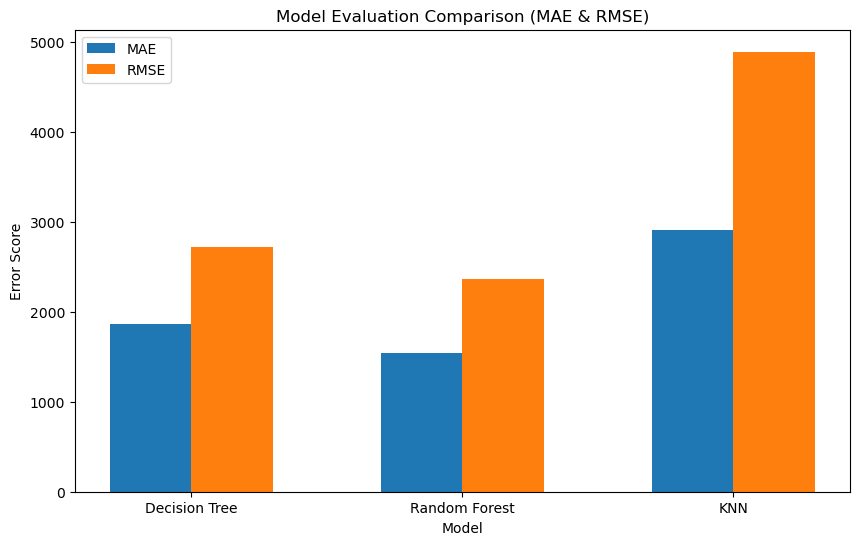

In [32]:
# Prepare the data for plotting
metrics = ['MAE', 'RMSE']
results = {metric: [] for metric in metrics}

for model_name in evaluation_results:
    for metric in metrics:
        results[metric].append(evaluation_results[model_name][metric])

# Plot the results
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
width = 0.3  # Bar width
x = np.arange(len(model_names))  # x-axis positions

# Plot each metric
for i, metric in enumerate(metrics):
    ax.bar(x + i * width, results[metric], width, label=metric)

# Customize plot
ax.set_xlabel('Model')
ax.set_ylabel('Error Score')
ax.set_title('Model Evaluation Comparison (MAE & RMSE)')
ax.set_xticks(x + width * (len(metrics) - 1) / 2)
ax.set_xticklabels(model_names)
ax.legend()

plt.show()

- MAE gives you the average magnitude of errors in predictions, where lower values indicate better performance.
  
- RMSE emphasizes larger errors more heavily due to squaring, so lower values again indicate better performance.

# Hyperparameter Tuning for KNN

We'll use RandomizedSearchCV to search over the grid of hyperparameters and find the best combination based on cross-validation.

In [35]:
from sklearn.model_selection import GridSearchCV


# Create the KNN regressor
knn = KNeighborsRegressor()

# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Uniform or distance-based weights
    'p': [1, 2]  # Manhattan distance (p=1) or Euclidean distance (p=2)
}
# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Optimizing for RMSE
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1  # Use all processors
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Extract the best model and parameters
best_knn_model = grid_search.best_estimator_
best_params = grid_search.best_params_


print("Best Hyperparameters found by GridSearchCV:")
print(best_params)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters found by GridSearchCV:
{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


## Train the best model for KNN

In [37]:
# Evaluate the tuned KNN model on the test set
y_pred = best_knn_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nKNN (Tuned) Evaluation:")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")


KNN (Tuned) Evaluation:
MAE: 1748.0374
RMSE: 2724.4821


## Compared with Non-Tuned KNN


In [39]:
knn.fit(X_train, y_train)

# Make predictions
y_pred_rf_original = knn.predict(X_test)
    
# Calculate MAE and RMSE
mae_knn_original = mean_absolute_error(y_test, y_pred_rf_original )
rmse_knn_original = np.sqrt(mean_squared_error(y_test, y_pred_rf_original ))

print(f"\nKNN (Original) Evaluation:")
print(f"MAE: {mae_knn_original:.4f}")
print(f"RMSE: {rmse_knn_original:.4f}")


KNN (Original) Evaluation:
MAE: 2908.3171
RMSE: 4887.4601


# Comparaison and Analysis of Result

In [41]:

models = [linear_model, decision_tree, random_forest, knn, best_knn_model]  # Replace with your models
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'KNN', 'KNN (Tuned)']  # Replace with your model names


# Initialize a dictionary to store the evaluation results
model_results = {}

# Evaluate each model on the test set
for model, name in zip(models, model_names):
    # Make predictions
    y_pred = model.predict(X_test)
        
    # Calculate MAE and RMSE
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
    # Store the results in the dictionary
    model_results[name] = {
        'MAE': mae,
        'RMSE': rmse
    }
    
# Convert the dictionary into a DataFrame for easy comparison
results_df = pd.DataFrame(model_results).T.reset_index()
results_df.columns = ['Model', 'MAE', 'RMSE']

# Format the values to 4 decimal places
results_df['MAE'] = results_df['MAE'].apply(lambda x: f"{x:.4f}")
results_df['RMSE'] = results_df['RMSE'].apply(lambda x: f"{x:.4f}")
    

# Display the results table
print("Model Performance Comparison:")
print(results_df)
    
# Identify the best model based on RMSE
best_model = results_df.loc[results_df['RMSE'].idxmin()]
print(f"\nBest Model Based on RMSE:\n{best_model}")


Model Performance Comparison:
               Model                   MAE                   RMSE
0  Linear Regression  451046849185826.5625  2888109012225198.0000
1      Decision Tree             1867.0000              2715.3668
2      Random Forest             1542.4167              2359.3793
3                KNN             2908.3171              4887.4601
4        KNN (Tuned)             1748.0374              2724.4821

Best Model Based on RMSE:
Model    Random Forest
MAE          1542.4167
RMSE         2359.3793
Name: 2, dtype: object


## Visualisation for Models Analysis Result

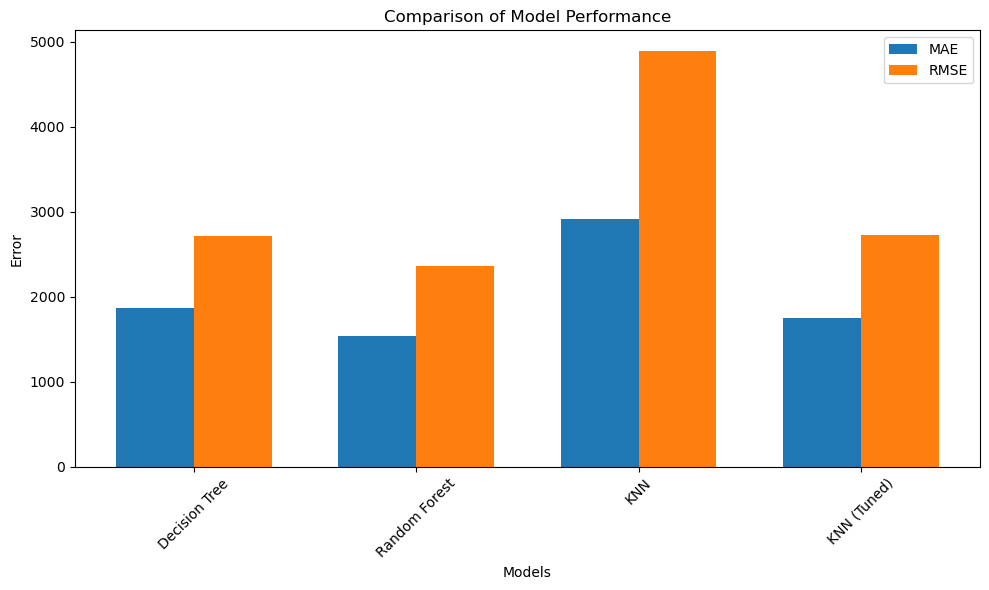

In [43]:

models = [ decision_tree, random_forest, knn, best_knn_model]  # Replace with your models
model_names = [ 'Decision Tree', 'Random Forest', 'KNN', 'KNN (Tuned)']  # Replace with your model names


# Initialize a dictionary to store the evaluation results
model_results = {}

# Evaluate each model on the test set
for model, name in zip(models, model_names):
    # Make predictions
    y_pred = model.predict(X_test)
        
    # Calculate MAE and RMSE
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
    # Store the results in the dictionary
    model_results[name] = {
        'MAE': mae,
        'RMSE': rmse
    }
    
# Convert the dictionary into a DataFrame for easy comparison
results_df = pd.DataFrame(model_results).T.reset_index()
results_df.columns = ['Model', 'MAE', 'RMSE']

# Format the values to 4 decimal places
results_df['MAE'] = results_df['MAE'].apply(lambda x: f"{x:.4f}")
results_df['RMSE'] = results_df['RMSE'].apply(lambda x: f"{x:.4f}")


# Convert MAE and RMSE to float for plotting
results_df['MAE'] = results_df['MAE'].astype(float)
results_df['RMSE'] = results_df['RMSE'].astype(float)

# Create a bar plot for MAE and RMSE comparison
x = np.arange(len(models))
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width / 2, results_df['MAE'], width, label='MAE')
bars2 = ax.bar(x + width / 2, results_df['RMSE'], width, label='RMSE')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Models')
ax.set_ylabel('Error')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(results_df['Model'], rotation=45)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Summary 
- Linear Regression : poor performance, both in MAE and RMSE, likely due to non-linear data relationships.
- Decision Tree: Better performance than linear regression but still not the best. Captures non-linear relationships better.
- Random Forest: Best overall, with the lowest MAE and RMSE. Its ensemble nature provides stability and better handling of overfitting.
- KNN: Poor performance initially, but tuning improved it significantly. The choice of neighbors plays a key role.
- KNN (Tuned): Significant improvement after tuning, showing the impact of hyperparameter adjustments.

# Implications 
- Best Model: Random Forest is the most reliable model for this dataset.
- Hyperparameter Tuning: Crucial for improving models like KNN, which benefited greatly from it.
- Error Metrics: RMSE highlights models that handle large errors better, while MAE gives a general idea of average error.

# Conclusion 
- Random Forest is the most robust model, but KNN (Tuned) is a strong alternative with proper tuning.
- Further exploration of other models or feature engineering could lead to even better results.